### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZI 7.3 e 7.4:</span> Molecular dinamycs NVE e Montecarlo NVT: Funzione di distribuzione radiale e confronto

Considerando nuovamente il codice scritto per l'esercitazione 4 (sistema classico di $N$ molecole che interagiscono tramite un potenziale adiabatico di Lennard-Jones)
$$V_{LJ}(r)=4\varepsilon \left[ \left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6} \right]$$
si aggiunge il calcolo della funzione di distribuzione radiale $g(r)$, come funzione della distanza radiale $r$ tra le molecole con $r \in \left[0; \frac{L}{2}\right]$ (si sono scelti $nbins=100$ intervalli discreti $[r_i, r_i+dr]$)
   $$g(r, r+dr)=\frac{1}{\rho N \Delta V(r)}\cdot \big\langle \sum \sum_{a\neq b =1}^N \delta [r - (r_a - r_b)] \big\rangle \hspace{2cm}\hbox{con}\hspace{2cm} \Delta V (r) = \frac{4\pi}{3}\left[(r+dr)^3 - r^3\right]$$
ovvero, computazionalmente, considero un istogramma di 100 bins ed ogni volta che trovo due molecole a distanza $\in [r_i, r_i+dr]$ aumento di 2 l'i-esimo bin.

Si confrontano quindi le simulazioni Montecarlo (NVT) - {Algoritmo di Metropolis} con Molecular Dynamics (NVE) - {Algoritmo di Verlet} attraverso lo studio di $N$ molecole di Argon ($N=108$), ponendo i  parametri del potenziale adiabatico di Lennard-Jones pari a
$$\sigma = 0.34 \hbox{ nm}\hspace{2cm}\epsilon/k_B = 120 \hbox{ K}\hspace{2cm} m=39.948 \hbox{ amu}$$

Mentre la densità $\rho^\star$ (in unità di LJ), la temperatura $T^\star$ (in unità di LJ) ed il raggio di cut-off dell'interazione $r_c$ (in unità di $\sigma$) nelle tre fasi della materia sono state fissate come di seguito:
1. fase solida: $\hspace{1.7cm}\rho^\star = 1.1\hspace{1.2cm} T^\star = 0.8\hspace{1cm} r_c = 2.2$
2. fase liquida: $\hspace{1.6cm}\rho^\star = 0.8\hspace{1.2cm} T^\star = 1.1\hspace{1cm} r_c = 2.5$
3. fase gassosa: $\hspace{1.25cm}\rho^\star = 0.05\hspace{1cm} T^\star = 1.2\hspace{1cm} r_c = 5.0$

Si mostrano nei grafici seguenti i valori medi e le incertezze per l'energia potenziale per molecola $\frac{U}{N}$, la pressione $P$ e la funzione di distribuzione radiale $g(r)$ in unità di LJ, fornendo un confronto tra la simulazione con il metodo Molecular Dinamycs (NVE) e quella con Montecarlo (NVT).

## <span style="color:blue"> GRAFICO A) </span> Energia potenziale per molecola: MC vs MD, solido/liquido/gassoso

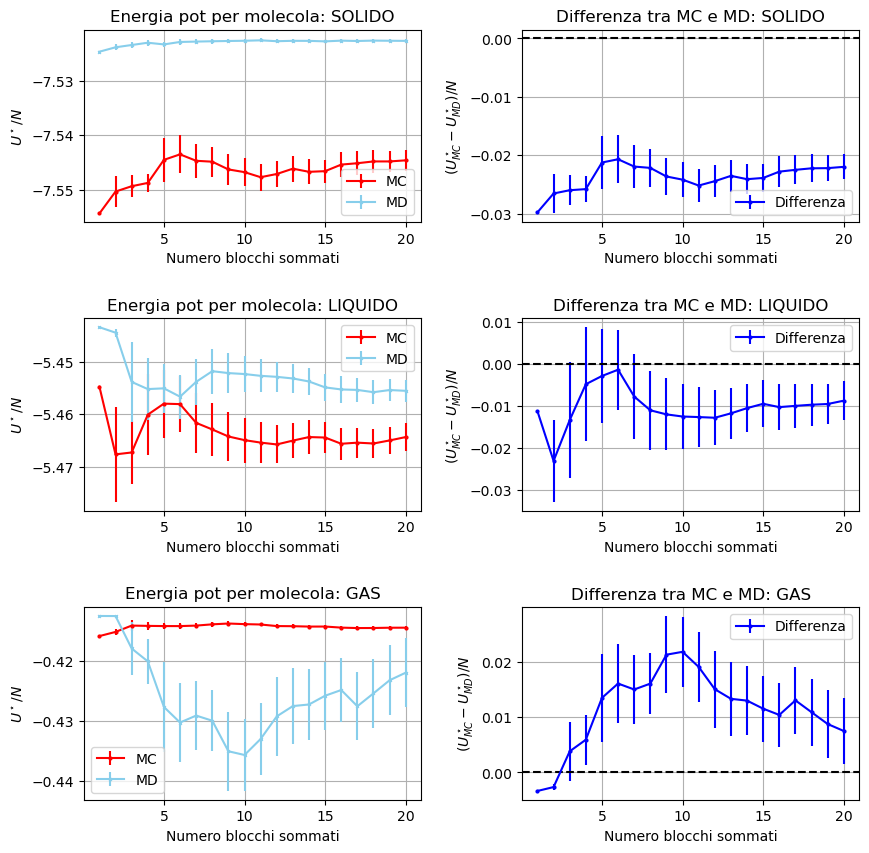

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file esterno
MCdata = np.loadtxt("4.MC.epot.out", usecols=(0,2,3))
MDdata = np.loadtxt('4.MD.epot.out', usecols=(0,2,3))

# Crea una figura con sei assi
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Calcola la differenza tra i dati e il grafico teorico
diff = MCdata[:,1] - MDdata[:,1]
diff_err = MCdata[:,2] + MDdata[:,2]


# Plotta il grafico sull'asse sinistro in alto
axs[0,0].errorbar(MCdata[:20,0], MCdata[:20,1], yerr=MCdata[:20,2], fmt='o-', color='red', markersize=2, label='MC')
axs[0,0].errorbar(MDdata[:20,0], MDdata[:20,1], yerr=MDdata[:20,2], fmt='x-', color='skyblue', markersize=2, label='MD')
axs[0,0].set_title('Energia pot per molecola: SOLIDO')
axs[0,0].set_xlabel("Numero blocchi sommati")
axs[0,0].set_ylabel(r"$U^\star/N$")
axs[0,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(MCdata[:20,0], diff[:20], yerr=diff_err[:20], fmt='o-', color='blue', markersize=2, label='Differenza')
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('Differenza tra MC e MD: SOLIDO')
axs[0,1].set_xlabel("Numero blocchi sommati")
axs[0,1].set_ylabel(r"$(U^\star_{MC}-U^\star_{MD})/{N}$")
axs[0,1].legend()


# Plotta il grafico sull'asse sinistro in alto
axs[1,0].errorbar(MCdata[20:40,0], MCdata[20:40,1], yerr=MCdata[20:40,2], fmt='o-', color='red', markersize=2, label='MC')
axs[1,0].errorbar(MDdata[20:40,0], MDdata[20:40,1], yerr=MDdata[20:40,2], fmt='x-', color='skyblue', markersize=2, label='MD')
axs[1,0].set_title('Energia pot per molecola: LIQUIDO')
axs[1,0].set_xlabel("Numero blocchi sommati")
axs[1,0].set_ylabel(r"$U^\star/N$")
axs[1,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[1,1].errorbar(MCdata[20:40,0], diff[20:40], yerr=diff_err[20:40], fmt='o-', color='blue', markersize=2, label='Differenza')
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('Differenza tra MC e MD: LIQUIDO')
axs[1,1].set_xlabel("Numero blocchi sommati")
axs[1,1].set_ylabel(r"$(U^\star_{MC}-U^\star_{MD})/{N}$")
axs[1,1].legend()


# Plotta il grafico sull'asse sinistro in alto
axs[2,0].errorbar(MCdata[40:60,0], MCdata[40:60,1], yerr=MCdata[40:60,2], fmt='o-', color='red', markersize=2, label='MC')
axs[2,0].errorbar(MDdata[40:60,0], MDdata[40:60,1], yerr=MDdata[40:60,2], fmt='x-', color='skyblue', markersize=2, label='MD')
axs[2,0].set_title('Energia pot per molecola: GAS')
axs[2,0].set_xlabel("Numero blocchi sommati")
axs[2,0].set_ylabel(r"$U^\star/N$")
axs[2,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[2,1].errorbar(MCdata[40:60,0], diff[40:60], yerr=diff_err[40:60], fmt='o-', color='blue', markersize=2, label='Differenza')
axs[2,1].axhline(y=0, color='black', linestyle='--')
axs[2,1].set_title('Differenza tra MC e MD: GAS')
axs[2,1].set_xlabel("Numero blocchi sommati")
axs[2,1].set_ylabel(r"$(U^\star_{MC}-U^\star_{MD})/{N}$")
axs[2,1].legend()


# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra il grafico
plt.show()

## <span style="color:green"> GRAFICO B) </span> Pressione: MC vs MD, solido/liquido/gassoso

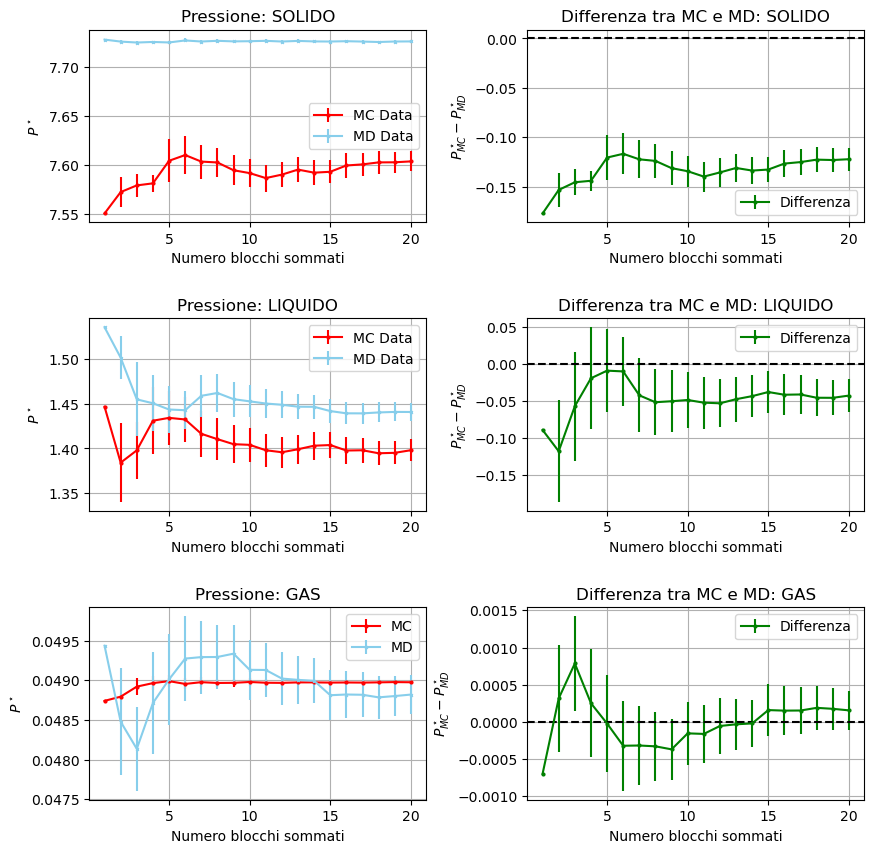

In [14]:
# Carica i dati dal file esterno
MCdata = np.loadtxt("4.MC.press.out", usecols=(0,2,3))
MDdata = np.loadtxt('4.MD.press.out', usecols=(0,2,3))

# Crea una figura con sei assi
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Calcola la differenza tra i dati e il grafico teorico
diff = MCdata[:,1] - MDdata[:,1]
diff_err = MCdata[:,2] + MDdata[:,2]


# Plotta il grafico sull'asse sinistro in alto
axs[0,0].errorbar(MCdata[:20,0], MCdata[:20,1], yerr=MCdata[:20,2], fmt='o-', color='red', markersize=2, label='MC Data')
axs[0,0].errorbar(MDdata[:20,0], MDdata[:20,1], yerr=MDdata[:20,2], fmt='x-', color='skyblue', markersize=2, label='MD Data')
axs[0,0].set_title('Pressione: SOLIDO')
axs[0,0].set_xlabel("Numero blocchi sommati")
axs[0,0].set_ylabel(r"$P^\star$")
axs[0,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(MCdata[:20,0], diff[:20], yerr=diff_err[:20], fmt='o-', color='green', markersize=2, label='Differenza')
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('Differenza tra MC e MD: SOLIDO')
axs[0,1].set_xlabel("Numero blocchi sommati")
axs[0,1].set_ylabel(r"$P^\star_{MC}-P^\star_{MD}$")
axs[0,1].legend()


# Plotta il grafico sull'asse sinistro in alto
axs[1,0].errorbar(MCdata[20:40,0], MCdata[20:40,1], yerr=MCdata[20:40,2], fmt='o-', color='red', markersize=2, label='MC Data')
axs[1,0].errorbar(MDdata[20:40,0], MDdata[20:40,1], yerr=MDdata[20:40,2], fmt='x-', color='skyblue', markersize=2, label='MD Data')
axs[1,0].set_title('Pressione: LIQUIDO')
axs[1,0].set_xlabel("Numero blocchi sommati")
axs[1,0].set_ylabel(r"$P^\star$")
axs[1,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[1,1].errorbar(MCdata[20:40,0], diff[20:40], yerr=diff_err[20:40], fmt='o-', color='green', markersize=2, label='Differenza')
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('Differenza tra MC e MD: LIQUIDO')
axs[1,1].set_xlabel("Numero blocchi sommati")
axs[1,1].set_ylabel(r"$P^\star_{MC}-P^\star_{MD}$")
axs[1,1].legend()


# Plotta il grafico sull'asse sinistro in alto
axs[2,0].errorbar(MCdata[40:60,0], MCdata[40:60,1], yerr=MCdata[40:60,2], fmt='o-', color='red', markersize=2, label='MC')
axs[2,0].errorbar(MDdata[40:60,0], MDdata[40:60,1], yerr=MDdata[40:60,2], fmt='x-', color='skyblue', markersize=2, label='MD')
axs[2,0].set_title('Pressione: GAS')
axs[2,0].set_xlabel("Numero blocchi sommati")
axs[2,0].set_ylabel(r"$P^\star$")
axs[2,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[2,1].errorbar(MCdata[40:60,0], diff[40:60], yerr=diff_err[40:60], fmt='o-', color='green', markersize=2, label='Differenza')
axs[2,1].axhline(y=0, color='black', linestyle='--')
axs[2,1].set_title('Differenza tra MC e MD: GAS')
axs[2,1].set_xlabel("Numero blocchi sommati")
axs[2,1].set_ylabel(r"$P^\star_{MC}-P^\star_{MD}$")
axs[2,1].legend()


# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra il grafico
plt.show()

## <span style="color:orange"> GRAFICO C) </span> Funzione di distribuzione radiale: MC vs MD, solido/liquido/gassoso

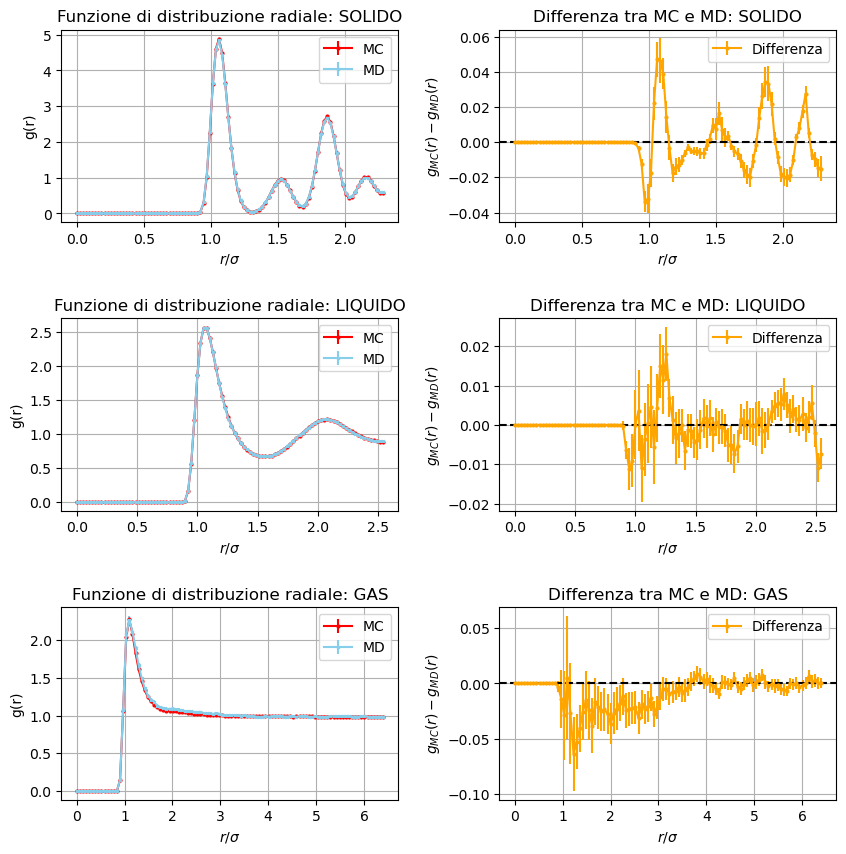

In [15]:
# Carica i dati dal file esterno
MCdata = np.loadtxt('4.MC.radial_dis.out')
MDdata = np.loadtxt('4.MD.radial_dis.out')

# Seleziona le righe con valore 20 nella prima colonna
selected_MCdata = MCdata[MCdata[:, 0] == 20]
selected_MDdata = MDdata[MDdata[:, 0] == 20]

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_MCdata[:,3] - selected_MDdata[:,3]
diff_err = selected_MCdata[:,4] + selected_MDdata[:,4]

# Crea una figura con sei assi
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Plotta il grafico sull'asse sinistro in alto
axs[0,0].errorbar(selected_MCdata[:100,1], selected_MCdata[:100,3], yerr=selected_MCdata[:100,4], fmt='o-', color='red', markersize=2, label='MC')
axs[0,0].errorbar(selected_MDdata[:100,1], selected_MDdata[:100,3], yerr=selected_MDdata[:100,4], fmt='x-', color='skyblue', markersize=2, label='MD')
axs[0,0].set_title('Funzione di distribuzione radiale: SOLIDO')
axs[0,0].set_xlabel(r"$r/\sigma$")
axs[0,0].set_ylabel("g(r)")
axs[0,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_MCdata[:100,1], diff[:100], yerr=diff_err[:100], fmt='o-', color='orange', markersize=2, label='Differenza')
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('Differenza tra MC e MD: SOLIDO')
axs[0,1].set_xlabel(r"$r/\sigma$")
axs[0,1].set_ylabel(r"$g_{MC}(r)-g_{MD}(r)$")
axs[0,1].legend()


# Plotta il grafico sull'asse sinistro in alto
axs[1,0].errorbar(selected_MCdata[100:200,1], selected_MCdata[100:200,3], yerr=selected_MCdata[100:200,4], fmt='o-', color='red', markersize=2, label='MC')
axs[1,0].errorbar(selected_MDdata[100:200,1], selected_MDdata[100:200,3], yerr=selected_MDdata[100:200,4], fmt='x-', color='skyblue', markersize=2, label='MD')
axs[1,0].set_title('Funzione di distribuzione radiale: LIQUIDO')
axs[1,0].set_xlabel(r"$r/\sigma$")
axs[1,0].set_ylabel("g(r)")
axs[1,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[1,1].errorbar(selected_MCdata[100:200,1], diff[100:200], yerr=diff_err[100:200], fmt='o-', color='orange', markersize=2, label='Differenza')
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('Differenza tra MC e MD: LIQUIDO')
axs[1,1].set_xlabel(r"$r/\sigma$")
axs[1,1].set_ylabel(r"$g_{MC}(r)-g_{MD}(r)$")
axs[1,1].legend()


# Plotta il grafico sull'asse sinistro in alto
axs[2,0].errorbar(selected_MCdata[200:300,1], selected_MCdata[200:300,3], yerr=selected_MCdata[200:300,4], fmt='o-', color='red', markersize=2, label='MC')
axs[2,0].errorbar(selected_MDdata[200:300,1], selected_MDdata[200:300,3], yerr=selected_MDdata[200:300,4], fmt='x-', color='skyblue', markersize=2, label='MD')
axs[2,0].set_title('Funzione di distribuzione radiale: GAS')
axs[2,0].set_xlabel(r"$r/\sigma$")
axs[2,0].set_ylabel("g(r)")
axs[2,0].legend()

# Plotta la differenza sull'asse destro in alto
axs[2,1].errorbar(selected_MCdata[200:300,1], diff[200:300], yerr=diff_err[200:300], fmt='o-', color='orange', markersize=2, label='Differenza')
axs[2,1].axhline(y=0, color='black', linestyle='--')
axs[2,1].set_title('Differenza tra MC e MD: GAS')
axs[2,1].set_xlabel(r"$r/\sigma$")
axs[2,1].set_ylabel(r"$g_{MC}(r)-g_{MD}(r)$")
axs[2,1].legend()

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra il grafico
plt.show()